## Final Project: Model Selection and Evaluation in Statistical Learning
### Problem Statement:
We need to analyse the Road Accident Survival dataset and find the model which best fits the data. We need to identify the impact of various features and predict the survival chances of people.

### Part 1: Dataset Information
The Road Accidet Survival dataset has 200 records which contains details about different factors that influence road accident survival probability. This dataset has been taken from kaggle for project purpose. This dataset is a combination of continuous and categorical features. Below are the list of variables present in the dataset with their datatype.
| Column Name | Description | Data Type |
| :- | :- | :- |
| Age|Age of the person|Integer|
|Gender|Male/Female|Object|
|Speed_of_impact|Speed at the time of collision|Float|
|Helmet_used|Helemt used - Yes/No|Object|
|Seatbelt_used|Seatbelt used - Yes/No|Object|
|Survived| Person survived - 0/1|Integer|

Based on the features listed below we need to create a model to identify if the person will survive or not. <br>
**Features** - Age, Gender, Speed_of_impact, Helmet_used, Seatbelt_used, Survived <br>
**Target** - Survived <br>
This dataset contains some missing values, which we will be dropping it since their count is small.
<br>
We will be using 4 models that will help us understand the data and then we will identify the best model based various performance metric.<br>
1. Logistic Regression
2. Decision Tree
3. K-nearest Neighbour
4. Random Forest

### Part 2: Data Exploration and Analysis
#### 1. Importing packages
Before we begin with dataset exploration, let us import the necessary packages.

In [162]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

#### 2. Reading the accident file:
We are reading the accident file. Since the first letter of the column name is in upper case, for the ease of coding, we are converting the column name to lower case and printing few records from the dataset.


In [164]:
#Reading data from the file
data=pd.read_csv('accident.csv')
data.columns = data.columns.str.lower()
print(data.head())


   age  gender  speed_of_impact helmet_used seatbelt_used  survived
0   56  Female             27.0          No            No         1
1   69  Female             46.0          No           Yes         1
2   46    Male             46.0         Yes           Yes         0
3   32    Male            117.0          No           Yes         0
4   60  Female             40.0         Yes           Yes         0


#### 3. Understanding data
We are using info() and describe() to check for missing or blank values and understand the datatypes and values present in the data. <br>
Based on the result, we know that there are missing values in column gender and speed_of_impact.

In [166]:
#Understanding the data values
data.info()
print(data.describe())
data.select_dtypes('object').describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              200 non-null    int64  
 1   gender           199 non-null    object 
 2   speed_of_impact  197 non-null    float64
 3   helmet_used      200 non-null    object 
 4   seatbelt_used    200 non-null    object 
 5   survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB
             age  speed_of_impact   survived
count  200.00000       197.000000  200.00000
mean    43.42500        70.441624    0.50500
std     14.94191        30.125298    0.50123
min     18.00000        20.000000    0.00000
25%     31.00000        43.000000    0.00000
50%     43.50000        71.000000    1.00000
75%     56.00000        95.000000    1.00000
max     69.00000       119.000000    1.00000


,gender,helmet_used,seatbelt_used
count,199,200,200
unique,2,2,2
top,Female,Yes,Yes
freq,110,111,111


#### 4. Checking null or duplicate records.
Using functions like isna(), isnull(), duplicated() we are trying to find missing or duplicate values in the data.<br>
There are 4 records which have missing values.

In [168]:
#Checking if the data has any missing, NULL or duplicate values 
print(f"Any Missing Values in the dataset: {data.isna().sum().sum()}")
print(f"Any Null Values in the dataset: {data.isnull().sum().sum()}")
print(f"Any Duplicate Values in the dataset: {data.duplicated().sum()}")

Any Missing Values in the dataset: 4
Any Null Values in the dataset: 4
Any Duplicate Values in the dataset: 0


#### 5. Handling Missing values:
We are dropping the records which have missing value as their number is small. Now the dataset contains 196 records which we consider for further analysis.

In [170]:
#Dropping the missing values from the dataset
print("Printing records having missing values.")
missing_values=data[data.isna().any(axis=1)]
print(missing_values)

print("\nDropping the records having missing values.")
data.dropna(inplace=True)

Printing records having missing values.
    age  gender  speed_of_impact helmet_used seatbelt_used  survived
15   41  Female              NaN          No            No         0
19   41    Male              NaN         Yes            No         1
29   42    Male              NaN         Yes            No         0
30   66     NaN             72.0          No           Yes         0

Dropping the records having missing values.


#### 6. Rechecking
Rechecking if the dataset contains any missing values

In [172]:
#Re-checking if the missing values are dropped
data.info()
print(f"\nAny Missing Values in the dataset: {data.isna().sum().sum()}")
print(f"Any Null Values in the dataset: {data.isnull().sum().sum()}")
print(f"Any Duplicate Values in the dataset: {data.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              196 non-null    int64  
 1   gender           196 non-null    object 
 2   speed_of_impact  196 non-null    float64
 3   helmet_used      196 non-null    object 
 4   seatbelt_used    196 non-null    object 
 5   survived         196 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.7+ KB

Any Missing Values in the dataset: 0
Any Null Values in the dataset: 0
Any Duplicate Values in the dataset: 0


#### 7. Converting categorical variables
We are converting categorical features - gender, helmet_used and seatbelt_used into continuous features using LabelEncoder().<br>
**For gender:** <br>
0 - Female and 1 - Male <br>
<br>
**For helmet_used and seatbelt_used:** <br>
0 - No and 1 - Yes <br>


In [175]:
#Converting categorical variables into numeric ones
encoder = LabelEncoder()

data['gender']=encoder.fit_transform(data['gender'])
data['helmet_used']=encoder.fit_transform(data['helmet_used'])
data['seatbelt_used']=encoder.fit_transform(data['seatbelt_used'])

data.head()

,age,gender,speed_of_impact,helmet_used,seatbelt_used,survived
0,56,0,27.0,0,0,1
1,69,0,46.0,0,1,1
2,46,1,46.0,1,1,0
3,32,1,117.0,0,1,0
4,60,0,40.0,1,1,0


#### 8. Understanding data distibution through visualization
Below visualization shows data distribution for all the features.

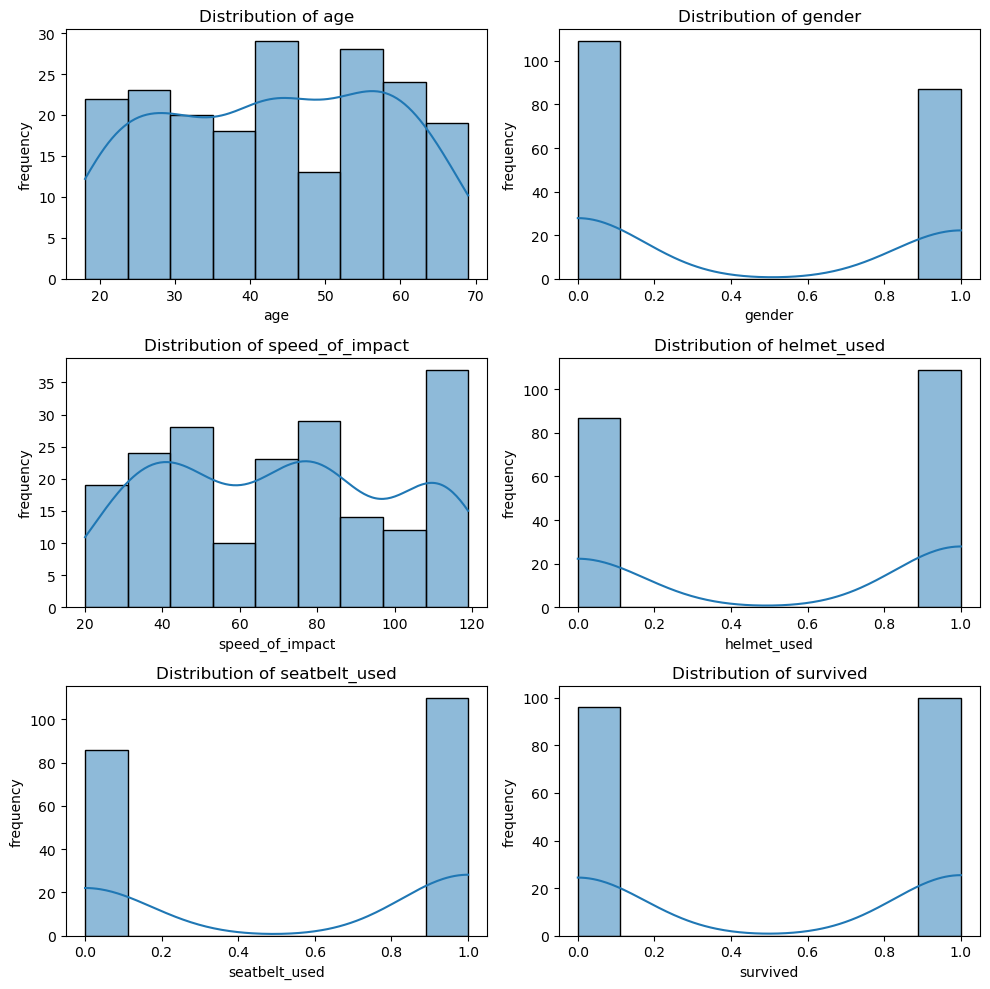

In [177]:
#Data Distribution
fig, axes = plt.subplots(3,2, figsize=(10,10))

for i, column in enumerate(data.columns):
    row = i // 2
    col = i % 2

    sns.histplot(data[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_ylabel('frequency')

plt.tight_layout()

#### 9. Checking distribution of survivors and non-survivors
We are cheking the distibution of survivors and non-survivors acorss all the features to understand the survival rate.<br>
**For speed_of_impact:** We can see that for lower speed to impact chances of survival are higher than for high speed.<br>
**For age:** Chances of survival are higher if the age is low than for the higher ones. <br>
**For gender:** Male surviving chances are high than female. <br>
**For helmet_used:** If the helment is used, then it increases the surival rate. <br>
**For seatbelt_used:** Same for seatbelt, if the seatbelt is used, then the chances of survival are high. <br>

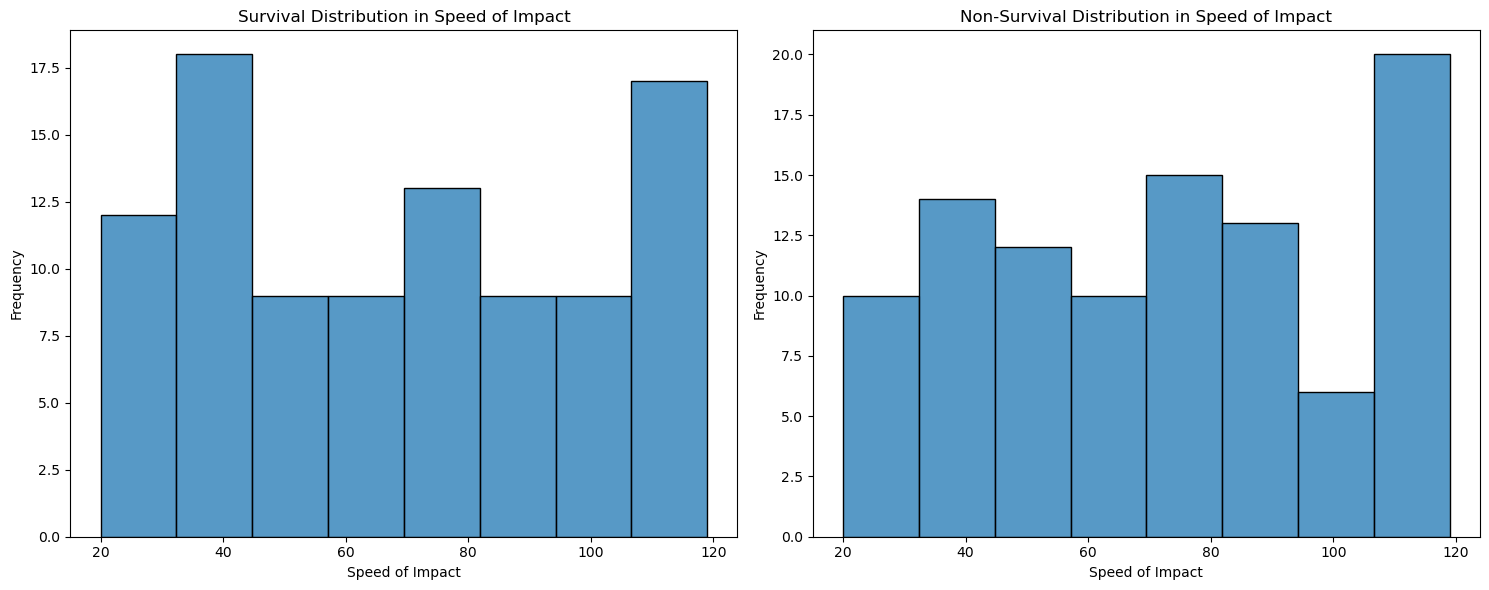

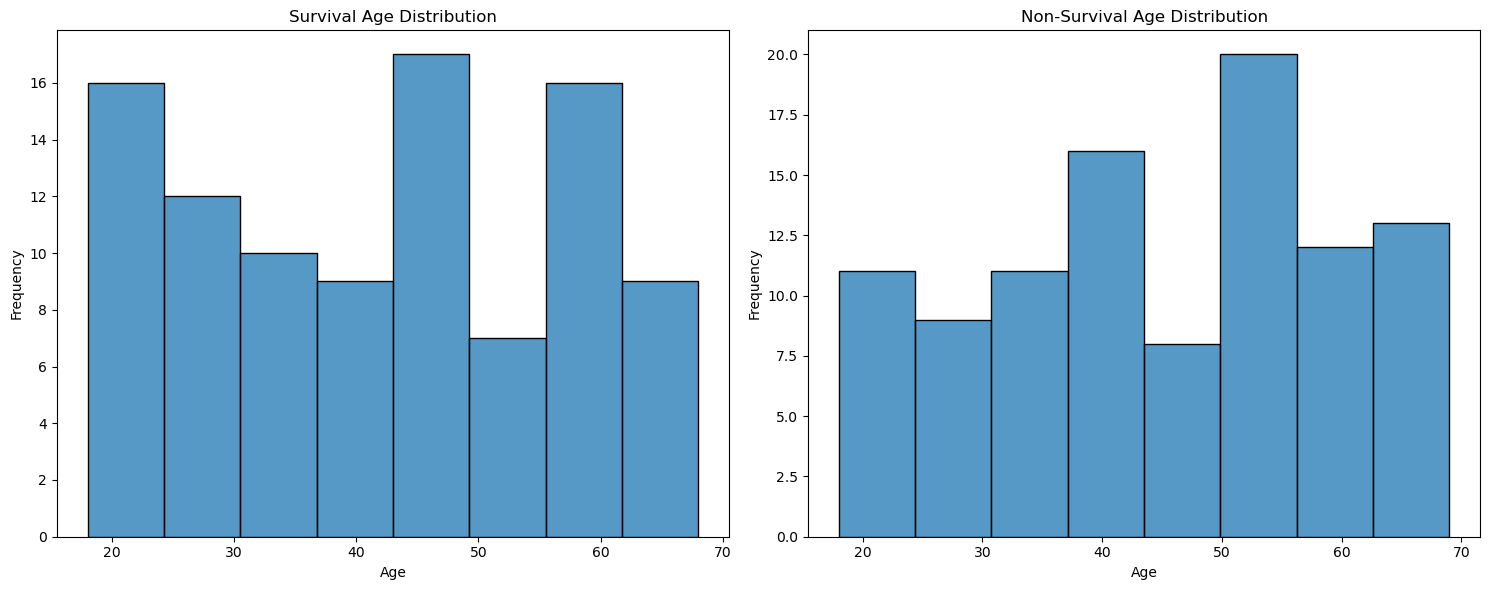

In [179]:
#Checking data distribution for survivors and non-survivors

survivor_speed_data=data[data['survived'] == 0]['speed_of_impact']
non_survivor_speed_data=data[data['survived'] == 1]['speed_of_impact']

survivor_age_data=data[data['survived'] == 0]['age']
non_survivor_age_data=data[data['survived'] == 1]['age']

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1) 
sns.histplot(survivor_speed_data)
plt.title("Survival Distribution in Speed of Impact")
plt.xlabel('Speed of Impact')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) 
sns.histplot(non_survivor_speed_data)
plt.title("Non-Survival Distribution in Speed of Impact")
plt.xlabel('Speed of Impact')
plt.ylabel('Frequency')

plt.tight_layout()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1) 
sns.histplot(survivor_age_data)
plt.title("Survival Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) 
sns.histplot(non_survivor_age_data)
plt.title("Non-Survival Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()

(array([0, 1]), [Text(0, 0, 'Seatbelt Not Used'), Text(1, 0, 'Seatbelt Used')])

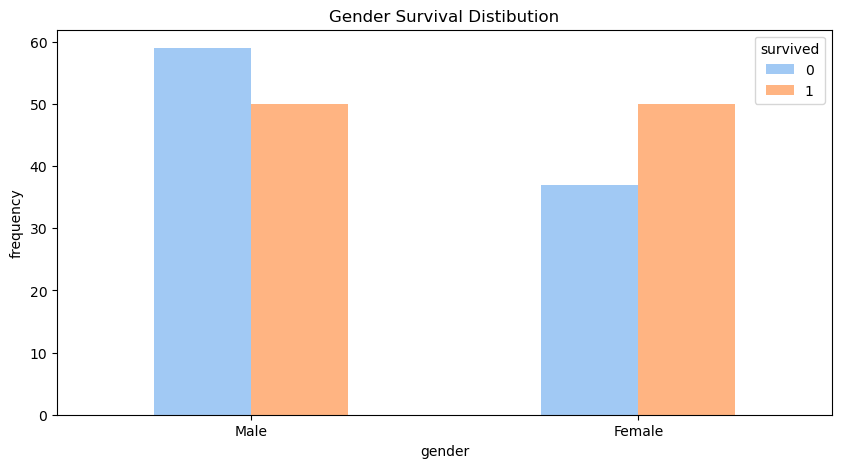

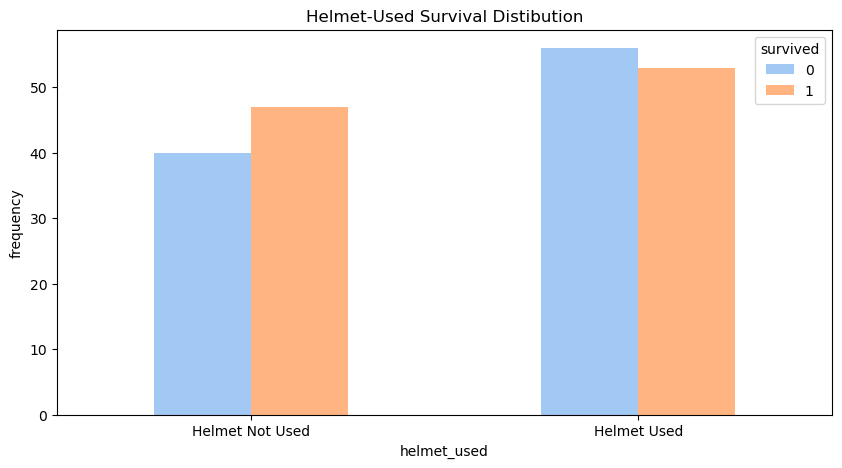

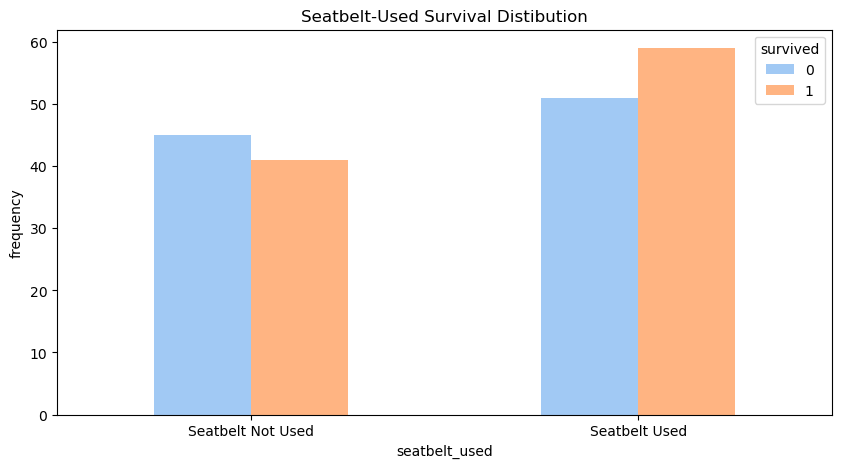

In [20]:
#Gender, helmet used and seatbelt used survival and non-survival data distribution
gender_survival = pd.crosstab(data['gender'], data['survived']).rename(index={0:'Male', 1:'Female'})
#print(gender_survival.head())
gender_survival.plot.bar(color=sns.color_palette('pastel'), figsize=(10,5),ylabel='frequency', title='Gender Survival Distibution')
plt.xticks(rotation=0)

helmet_survival = pd.crosstab(data['helmet_used'], data['survived']).rename(index={0:'Helmet Not Used', 1:'Helmet Used'})
#print(gender_survival.head())
helmet_survival.plot.bar(color=sns.color_palette('pastel'), figsize=(10,5),ylabel='frequency', title='Helmet-Used Survival Distibution')
plt.xticks(rotation=0)

seatbelt_survival = pd.crosstab(data['seatbelt_used'], data['survived']).rename(index={0:'Seatbelt Not Used', 1:'Seatbelt Used'})
#print(gender_survival.head())
seatbelt_survival.plot.bar(color=sns.color_palette('pastel'), figsize=(10,5),ylabel='frequency', title='Seatbelt-Used Survival Distibution')
plt.xticks(rotation=0)

#### 10. Scatter plot of Age Vs Speed of Impact
We are checking the survival distribution for age vs speed of impact. From the below scatter plot, we can conclude that if the speed and age is less survival chances are high but as the speed and age increases chances are less, but there is not very clear picture here.<br>
**Note:**<br>
0 - yellow - Survived<br>
1 - blue - Not Survived

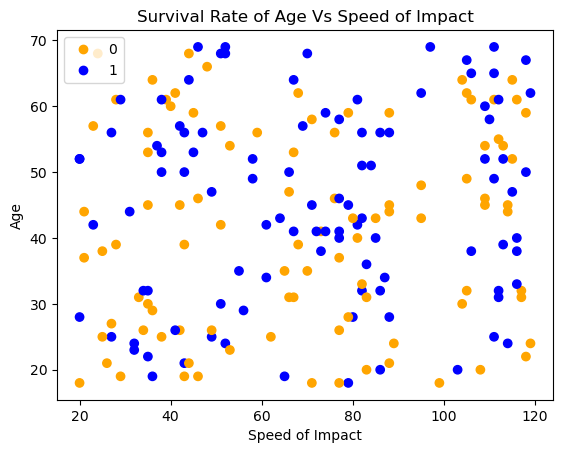

In [181]:
#Plotting scatter plot 
from matplotlib.colors import ListedColormap

colors = ListedColormap(['orange', 'blue'])
scatter=plt.scatter(data['speed_of_impact'],data['age'],c=data['survived'],cmap=colors)
plt.legend(*scatter.legend_elements())
plt.xlabel('Speed of Impact')
plt.ylabel('Age')
plt.title("Survival Rate of Age Vs Speed of Impact")
plt.show()

### Part 3: Modelling
We are splitting the data into training and testing set in 80-20 ratio.

In [183]:
#Spliting the data into training and testing set
x=data[['age','gender','speed_of_impact','helmet_used','seatbelt_used']]
y=data['survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=5)

print(f"No of records in training set - {len(x_train)}")
print(f"No of records in testing set - {len(x_test)}")

No of records in training set - 156
No of records in testing set - 40


#### Model 1 - Logistic Regression Model
#### 1. Training data with Logistic Regression
Logistic Regression Model works best in binary classification and if the data shows a linear distribution. As this is a binary classification problem, we have selected this model.

In [185]:
#Training the model with logistic regression
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

logistic_model_predict=logistic_model.predict(x_test)

[[10 10]
 [11  9]]


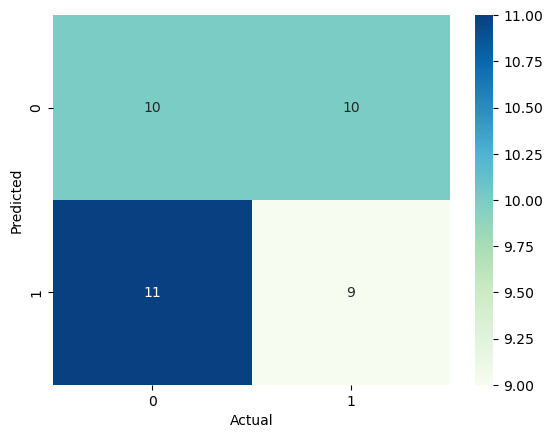

In [189]:
#Logistic Model Evaluation
logistic_cm = confusion_matrix(y_test, logistic_model_predict)

print(logistic_cm)
sns.heatmap(logistic_cm, cmap='GnBu',fmt='d',annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [191]:
#Classification Report
logistic_report = classification_report(y_test, logistic_model_predict)
print(logistic_report)

              precision    recall  f1-score   support

           0       0.48      0.50      0.49        20
           1       0.47      0.45      0.46        20

    accuracy                           0.47        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.47      0.47      0.47        40



#### 2. Logistic Regression Model Evaluation:
Below is the model evaluation summary:<br>
1. **Confusion Matrix:** From the confusion matrix we can understand that the model is able to predict 50% of the records correctly.<br>
2. **Accuracy:** 0.47 <br>
3. **Average Precision:** 0.47 <br>
4. **Average Recall:** 0.47 <br>
The model exhibits average accuracy. There are chances of improvement here. For checking improvement and to understand significant features, we are using **Logit model** from statsmodel package.

In [193]:
#Using statsmodel's Logit function to check the summary report

log_model=sm.Logit(y_train,x_train)
log_result=log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.666046
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  156
Model:                          Logit   Df Residuals:                      151
Method:                           MLE   Df Model:                            4
Date:                Fri, 07 Mar 2025   Pseudo R-squ.:                 0.03864
Time:                        16:03:15   Log-Likelihood:                -103.90
converged:                       True   LL-Null:                       -108.08
Covariance Type:            nonrobust   LLR p-value:                   0.07947
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.0109      0.008      1.291      0.197      -0.006       0.028
gender        

#### 3. Logit Model Evaluation
We ran the Logit Model with training data to identify significant features that are related to target feature. From the above summary report, we can come to know that age, gender and helmet_used are important as their p-value is less compared to speed_of_impact and seatbelt_used. Ideally, we consider features having p-value less than 0.05. But, if we use this criteria then we will be left with only one feature ie helment_used and running the model based 1 feature does not make any sense. Hence, we are considering 3 features. <br>
Lets consider 3 features as significant ones - age, gender, helmet_used and check if the Logistic Regression Model's performance.

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        20
           1       0.56      0.50      0.53        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40

[[12  8]
 [10 10]]


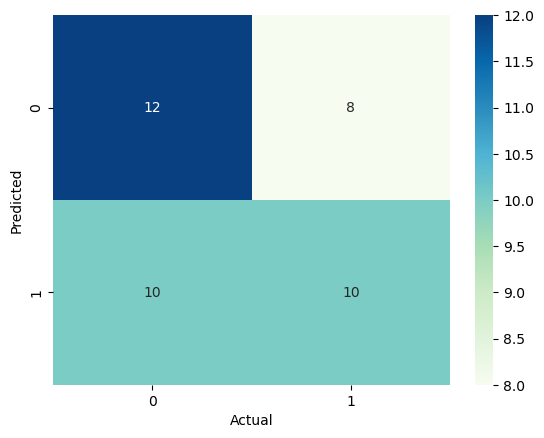

In [195]:
#Logistic Regression with significant parameter
x1=data[['helmet_used','gender','age']]
y1=data['survived']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, train_size=0.8, random_state=5)

logistic_model1=LogisticRegression()
logistic_model1.fit(x1_train,y1_train)

logistic_model_predict1=logistic_model1.predict(x1_test)

logistic_report1 = classification_report(y1_test, logistic_model_predict1)
print(logistic_report1)

logistic_cm1 = confusion_matrix(y1_test, logistic_model_predict1)
print(logistic_cm1)
sns.heatmap(logistic_cm1, cmap='GnBu',fmt='d',annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

#### 4. Logistic Regression Model Evaluation with significant features
We have considered only 3 features - age, gender and helmet_used and trained logistic regression model. From the classification report we can see that the model's accuracy has improved from 0.47 to 0.55. <br>
Below is the model evaluation:<br>
1. **Confusion Matrix:** The model is able to predict actual values with better accuracy compared to previous model.
2. **Accuracy:** 0.55 <br>
3. **Precision:** Average Precision score is 0.55. This score is better than the previous model. <br>
4. **Recall:** Average Recall score is 0.55. this score is better than previous model. <br>
This model shows better accuracy, recall and precision than the previous Logistic Regression Model.

#### 5. Logistic Regression with k-fold Cross Validation 
Cross Validation is a technique to check how the model with perform on unseen data inorder to avoid overfitting. We will be using k-fold cross validation to evaluate the model's performance. We will split the data in 10 folds and check the model's performance by through the values of accuracy and mean absolute error. For Logistic regression, we are considering all the features for modelling.

In [198]:
#Model Evaluation through k-fold cross validation
from sklearn.model_selection import KFold

# Define number of folds
k = 10

# Initialize a KFold object
kf = KFold(n_splits=k)

# Initialize lists to store R-squared scores and MSE for each fold
acc_scores = []
mae_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    #Y_test_flatten=Y_test.values.flatten()

    # Create and train a model 
    log_model = LogisticRegression()
    log_model.fit(X_train, Y_train)

    # Evaluate the model on the test set
    ylog_pred = log_model.predict(X_test)
    acc = accuracy_score(Y_test, ylog_pred)
    log_mae = mean_absolute_error(Y_test, ylog_pred)

    acc_scores.append(acc)
    mae_scores.append(log_mae)

# Calculate and store the mean accuracy and mean MAE scores for this value of k
mean_acc = np.mean(acc_scores)
mean_mae = np.mean(mae_scores)

print(f"Mean MAE Score: {mean_mae}")
print(f"Mean Accuracy Score: {mean_acc}")



Mean MAE Score: 0.4726315789473684
Mean Accuracy Score: 0.5273684210526316


#### Model Evaluation with k-fold Cross Validation
The mean accuracy score for this model is higher than the original model but the value of average mean absolute error score is less. Below we have plotted the accuracy score and mean absolute error score calculated during each fold. From the graphs, we can see that mean absolute error is reducing with each fold and accuracy of the model is improving with each fold.

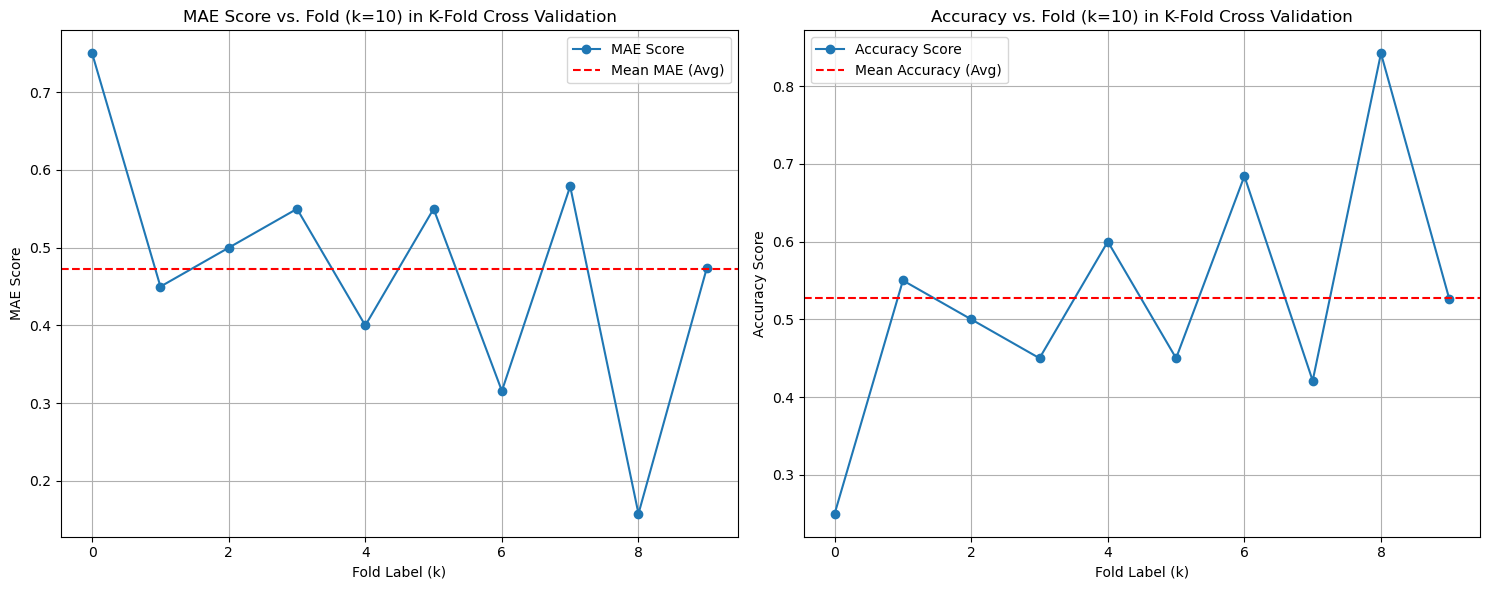

In [200]:
#Plotting MAE and accuracy values per fold
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1) 
plt.plot(list(range(k)), mae_scores, marker='o', linestyle='-', label='MAE Score')
plt.axhline(y=np.mean(mean_mae), color='r', linestyle='--', label='Mean MAE (Avg)')
plt.xlabel('Fold Label (k)')
plt.ylabel('MAE Score')
plt.title(f'MAE Score vs. Fold (k={k}) in K-Fold Cross Validation')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(list(range(k)), acc_scores, marker='o', linestyle='-', label='Accuracy Score')
plt.axhline(y=np.mean(mean_acc), color='r', linestyle='--', label='Mean Accuracy (Avg)')
plt.xlabel('Fold Label (k)')
plt.ylabel('Accuracy Score')
plt.title(f'Accuracy vs. Fold (k={k}) in K-Fold Cross Validation')
plt.grid(True)
plt.legend()

plt.tight_layout()

#### Model 2 : Decision Tree
#### 1. Training data with Decision Tree
Decision Tree is a popular choice for a classification model when the relationship between different variables is non-linear. In our case, we can use decision tree as we have non-linear relationship. For modeling, we are considering max dept of decision tree as 5, max features to consider as 3 and criteria as entropy.

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        20
           1       0.56      0.50      0.53        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40

[[12  8]
 [10 10]]


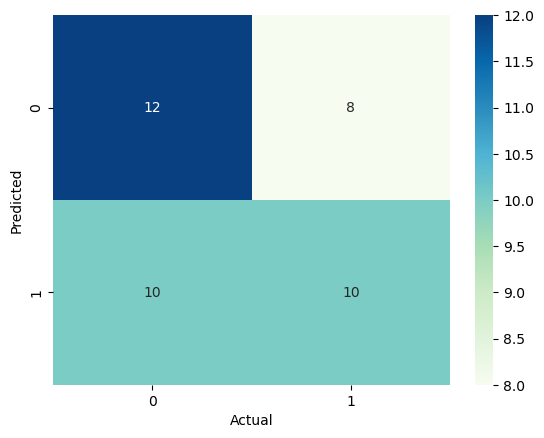

In [202]:
#Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5,max_features=3, random_state=0,criterion = 'entropy')
dt_model.fit(x_train, y_train)
dt_predicted = dt_model.predict(x_test)

#Decision Tree Model Evaluation
dt_report = classification_report(y_test, dt_predicted)
print(dt_report)

dt_cm = confusion_matrix(y_test, dt_predicted)
print(dt_cm)
sns.heatmap(dt_cm, cmap='GnBu',fmt='d',annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

#### 2. Decision Tree Model Evaluation:
Below is the model evaluation:
1. **Confusion Matrix:** The model can predict around 50% of data correctly, but still there are chances of improvement.<br>
2. **Accuracy:** 0.55. This accuracy score is greater than logistic regression model. <br>
3. **Precision:** Average Precision score is 0.55. This score is similar to logistic regression model.<br>
4. **Recall:** Average Recall score is 0.55. This score is similar to logistic regression model.<Br>
 <br> 
Below plot shows the decision tree diagram for the accident dataset.

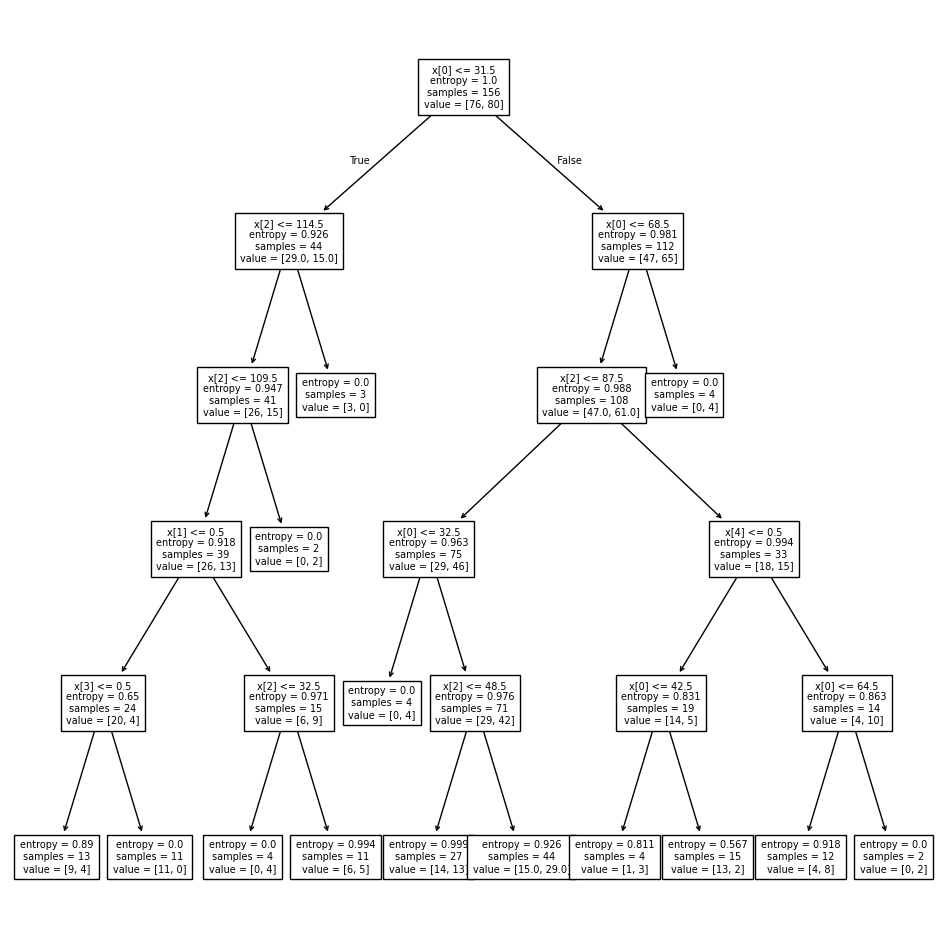

In [204]:
#Printing decision tree
from sklearn import tree
plt.figure(figsize=(12,12))
tree.plot_tree(dt_model,fontsize=7)
plt.show()

#### 3. Decision Tree using k-fold Cross Validation
We are using k-fold cross validation to check if the performance of the model can be improved. Like logistic regression, we have considered 10 folds. <br>
Model Evaluation:<br>
Avereage Mean Absolute Error = 0.51 and average accuracy = 0.49. <br>
The accuracy score is very less compared to the original model. We can conclude that k-fold validation technique is not improving the performance of decision tree. We have plotted the values of mean absolute error and accuracy of the model at different interval of k-folds. From the plots, we cannot come to any conclusion as there is no clear pattern or trend. Sometimes it is performaing well and sometimes not. In this case, the original model's performance is better.

In [206]:
#Model Evaluation through k-fold cross validation
from sklearn.model_selection import KFold

# Define number of folds
k = 10

# Initialize a KFold object
kf = KFold(n_splits=k)

# Initialize lists to store R-squared scores and MSE for each fold
acc_scores = []
mae_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    #Y_test_flatten=Y_test.values.flatten()

    # Create and train a model 
    dt_model1 = DecisionTreeClassifier(max_depth=5,max_features=3, random_state=0,criterion = 'entropy')
    dt_model1.fit(X_train, Y_train)

    # Evaluate the model on the test set
    ydt_pred = dt_model1.predict(X_test)
    dt_acc = accuracy_score(Y_test, ydt_pred)
    dt_mae = mean_absolute_error(Y_test, ydt_pred)

    acc_scores.append(dt_acc)
    mae_scores.append(dt_mae)

# Calculate and store the mean accuracy and mean MAE scores for this value of k
mean_acc = np.mean(acc_scores)
mean_mae = np.mean(mae_scores)

print(f"Mean MAE Score: {mean_mae}")
print(f"Mean Accuracy Score: {mean_acc}")



Mean MAE Score: 0.5055263157894736
Mean Accuracy Score: 0.4944736842105263


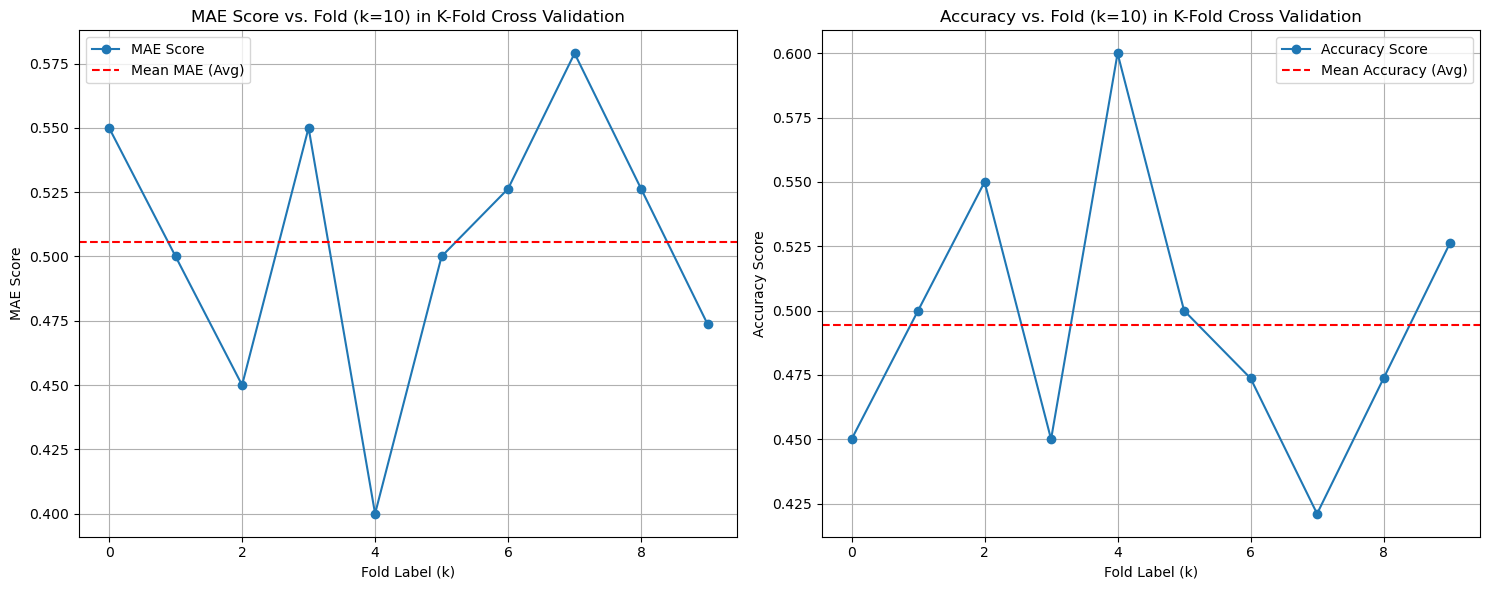

In [208]:
#Plotting MAE and accuracy per fold

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1) 
plt.plot(list(range(k)), mae_scores, marker='o', linestyle='-', label='MAE Score')
plt.axhline(y=np.mean(mean_mae), color='r', linestyle='--', label='Mean MAE (Avg)')
plt.xlabel('Fold Label (k)')
plt.ylabel('MAE Score')
plt.title(f'MAE Score vs. Fold (k={k}) in K-Fold Cross Validation')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(list(range(k)), acc_scores, marker='o', linestyle='-', label='Accuracy Score')
plt.axhline(y=np.mean(mean_acc), color='r', linestyle='--', label='Mean Accuracy (Avg)')
plt.xlabel('Fold Label (k)')
plt.ylabel('Accuracy Score')
plt.title(f'Accuracy vs. Fold (k={k}) in K-Fold Cross Validation')
plt.grid(True)
plt.legend()

plt.tight_layout()

#### Model 3 - K-nearest Neighbours Classifier
#### 1. Deciding the value of k:
We are training our model with k-nearest Neighbour since we could see small group of clusters when we plot scatter plot of survival probability of age vs speed of impact. Before we begin with modeling we need to decide the no of cluster groups. Using below code we are modelling the dataset considering k=1 to k=30 and checking the accuracy. Which ever cluster number gives the highest accuracy will be considered for further modelling. As per the code, when k=4 the accuracy is high.

Text(0, 0.5, 'Accuracy Score')

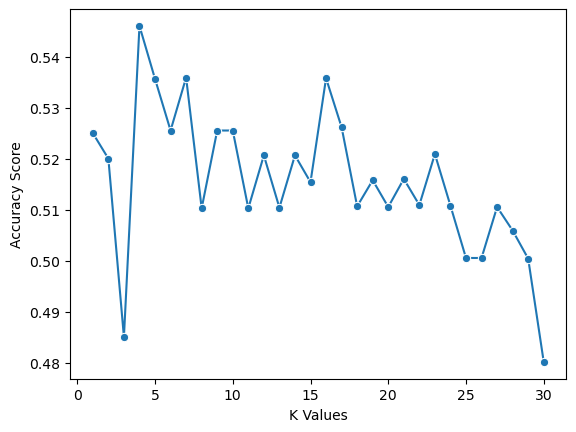

In [211]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(x)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

#### 2. Model Training and Evaluation:
We are considering k=4 and distance metric calculation as euclidean as hyper parameters for k-nearest neighbour modelling. <br>
Below is the model evaluation:<br>
1. **Confusion Matrix:** k-nearest neighbour shows better prediction of testing data, compared to previous 2 models. The model predict label - 0 ie survival rate better than label - 1 ie non-survival. <br>
2. **Accuracy:** 0.62. Accuracy score is much better than the previous models.<br>
3. **Precision:** Average Precision is around 0.68. There is better precision score in predicting label- 0 unlike label- 1.<br>
4. **Recall:** Average Recall is 0.62. There is better recall score in predicting label- 0 unlike label- 1.<br>
Overall the model's performance is better than Logistic Regression and Decision Tree.

[[18  2]
 [13  7]]


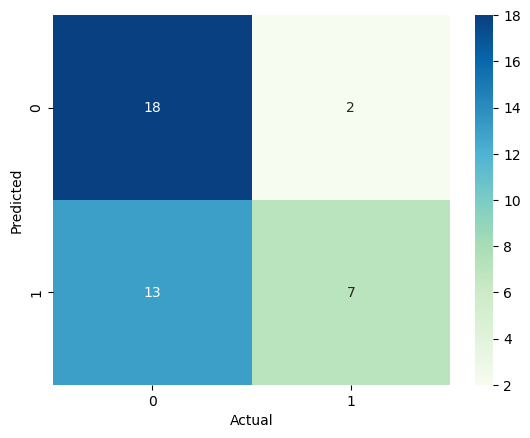

              precision    recall  f1-score   support

           0       0.58      0.90      0.71        20
           1       0.78      0.35      0.48        20

    accuracy                           0.62        40
   macro avg       0.68      0.62      0.59        40
weighted avg       0.68      0.62      0.59        40



In [213]:
#K-nearest classifier
kn_model = KNeighborsClassifier(n_neighbors=4, metric='euclidean', algorithm='auto',weights='uniform',p=2)
kn_model.fit(x_train, y_train)
kn_predicted = kn_model.predict(x_test)

#Model Evaluation
kn_cm = confusion_matrix(y_test, kn_predicted)
print(kn_cm)
sns.heatmap(kn_cm, cmap='GnBu',fmt='d',annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

kn_report = classification_report(y_test, kn_predicted)
print(kn_report)

#### 4. Graphical plot of k-nearest neighbour prediction
Below scatter plots shows predicted result of k-nearest neighbour and actual result for testing data.

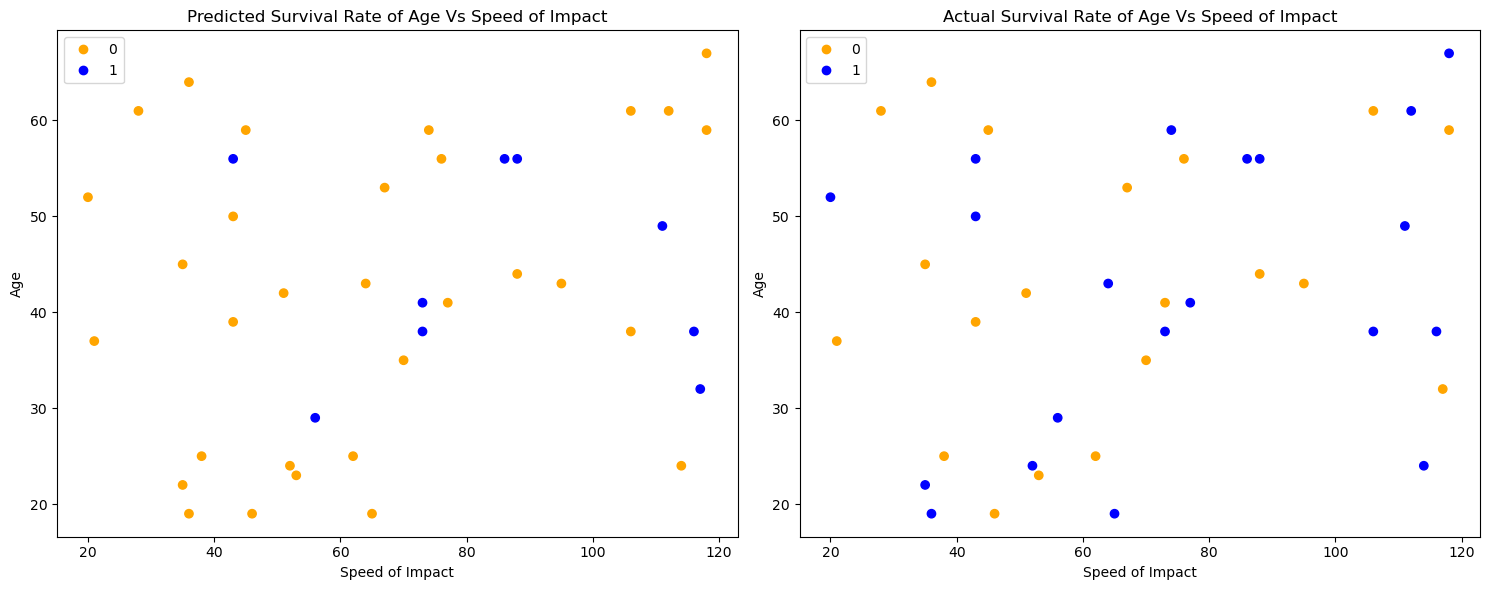

In [215]:
#Plotting scatter plot 
from matplotlib.colors import ListedColormap

colors = ListedColormap(['orange', 'blue'])

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1) 
scatter=plt.scatter(x_test['speed_of_impact'],x_test['age'],c=kn_predicted,cmap=colors)
plt.legend(*scatter.legend_elements())
plt.xlabel('Speed of Impact')
plt.ylabel('Age')
plt.title("Predicted Survival Rate of Age Vs Speed of Impact")

plt.subplot(1, 2, 2) 
scatter=plt.scatter(x_test['speed_of_impact'],x_test['age'],c=y_test,cmap=colors)
plt.legend(*scatter.legend_elements())
plt.xlabel('Speed of Impact')
plt.ylabel('Age')
plt.title("Actual Survival Rate of Age Vs Speed of Impact")

plt.tight_layout()

#### Model 4: Random Forest Classification
#### Model Training and Evaluation:
Random Forest is an ensemble model where multiple decision trees are used for better prediction. Decision Trees are building blocks of random forest. Since we have trained our model with decision tree, random forest is a good choice, to check if we can get better results. <br>
Below is the model evaluation:<br>
1. **Confusion Matrix:** This model's performance is better in predicting actual values.
2. **Accuracy:** 0.60. Accuracy score is better compared to Logistic model and decision tree but little less than k-nearest neighbour.
3. **Precision:** Average Precision score is 0.60. This model shows better precision score in predicting actual values.
4. **Recall:** Average Recall score is 0.60. This model shows better recall score in predicting actual values.<br>
Compared to other model, this model shows a balance is predicting both the actual target values as compared to k-nearest neighbour which showed better prediction for label- 0.

[[11  9]
 [ 7 13]]


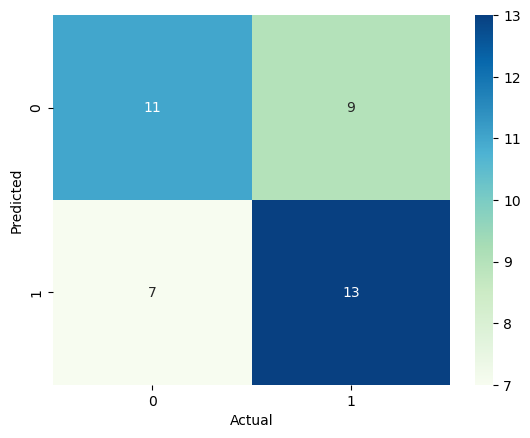

              precision    recall  f1-score   support

           0       0.61      0.55      0.58        20
           1       0.59      0.65      0.62        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



In [217]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=0)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
rf_pred = rf_model.predict(x_test)

# Evaluate the model
rf_cm = confusion_matrix(y_test, rf_pred)
print(rf_cm)
sns.heatmap(rf_cm, cmap='GnBu',fmt='d',annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

rf_report = classification_report(y_test, rf_pred)
print(rf_report)


### Part 4: Model Evaluation
Confusion Matrix, Accuracy, Precision and Recall are part of model evaluation metric but are calculated while training to better understand the model predictions.
#### 1. Loss, Bias and Variance Calculation
**Bias** - Bias is an error that occurs when the model makes incorrect assumption regarding training data which leads to wrong prediction. This can lead to model underfitting the data. <br>
**Variance** - Variance is an error that occurs when the model captures noise present in the training data ie. it learns the patterns present in the data too well. This may lead to model overfitting the data. <br>
We need to calculate the bias and variance values of the model inorder to understand how well the model generalizes the data. <br>
High Bias - The model is oversimplistic and High Variance - the model has learnt the training data well. <br>
These values play a crucial role in model evaluation inorder to understand which model fits the data well. <br>
**Loss:** Loss represents how many records the model is able to predict correctly. It is calculated by taking difference between model's predicted output with actual values. Low loss means better model.<br>
**Note:** We have considered Logistic Model with all the features for the calculation of bias, variance and loss.<br>
We will compare the model based on loss, bias and variance in model evaluation summary.

In [219]:
#Bias and Variance Calculation
from mlxtend.evaluate import bias_variance_decomp

#loss, bias and variance for logistic regression- Model 1
log_loss, log_bias,log_var=bias_variance_decomp(logistic_model, x_train.values, y_train.values, x_test.values, y_test.values, loss='0-1_loss', num_rounds=200, random_seed=5)

print('Average expected loss for Logistic Model-1: %.3f' % log_loss)
print('Average bias for Logistic Model-1: %.3f' % log_bias)
print('Average variance for Logistic Model-1: %.3f' % log_var)

#loss, bias and variance for Decision Tree
dt_loss, dt_bias,dt_var=bias_variance_decomp(dt_model, x_train.values, y_train.values, x_test.values, y_test.values, loss='0-1_loss', num_rounds=200, random_seed=5)

print('\nAverage expected loss for Decision Tree: %.3f' % dt_loss)
print('Average bias for Decision Tree: %.3f' % dt_bias)
print('Average variance for Decision Tree: %.3f' % dt_var)


#loss, bias and variance for k-nearest classifier
kn_loss, kn_bias,kn_var=bias_variance_decomp(kn_model, x_train.values, y_train.values, x_test.values, y_test.values, loss='0-1_loss', num_rounds=200, random_seed=5)

print('\nAverage expected loss for K-nearest neighbour: %.3f' % kn_loss)
print('Average bias for K-nearest neighbour: %.3f' % kn_bias)
print('Average variance for K-nearest neighbour: %.3f' % kn_var)

#loss, bias and variance for Random Forest
rf_loss, rf_bias,rf_var=bias_variance_decomp(rf_model, x_train.values, y_train.values, x_test.values, y_test.values, loss='0-1_loss', num_rounds=200, random_seed=5)

print('\nAverage expected loss for Random Forest: %.3f' % rf_loss)
print('Average bias for Random Forest: %.3f' % rf_bias)
print('Average variance for Random Forest: %.3f' % rf_var)

Average expected loss for Logistic Model-1: 0.510
Average bias for Logistic Model-1: 0.525
Average variance for Logistic Model-1: 0.190

Average expected loss for Decision Tree: 0.494
Average bias for Decision Tree: 0.375
Average variance for Decision Tree: 0.379

Average expected loss for K-nearest neighbour: 0.435
Average bias for K-nearest neighbour: 0.400
Average variance for K-nearest neighbour: 0.301

Average expected loss for Random Forest: 0.442
Average bias for Random Forest: 0.425
Average variance for Random Forest: 0.222


#### 2. Mean Absolute Error (MAE)
MAE is an evaluation metric used to measure accuracy of the model. It calculates, on an average, how much our prediction differ from actual values. MAE is easy to understand and interpret which makes it a good choice in model selection.

In [221]:
#Mean Absolute Error
log_mae = mean_absolute_error(y_test, logistic_model_predict)
dt_mae = mean_absolute_error(y_test, dt_predicted)
knn_mae = mean_absolute_error(y_test, kn_predicted)
rf_mae = mean_absolute_error(y_test, rf_pred)

print(f"Logistic Regression Model Mean Absolute Error - {log_mae}")
print(f"Decision Tree Model Mean Absolute Error - {dt_mae}")
print(f"K Nearest Neighbour Mean Absolute Error - {knn_mae}")
print(f"Random Forest Model Mean Absolute Error - {rf_mae}")

Logistic Regression Model Mean Absolute Error - 0.525
Decision Tree Model Mean Absolute Error - 0.45
K Nearest Neighbour Mean Absolute Error - 0.375
Random Forest Model Mean Absolute Error - 0.4


#### 3. Model Evaluation Summary:
Different metrics used for model evaluation are:
1. Accuracy
2. Recall
3. Precision
4. Confusion Matrix
5. Bias and Variance
6. Loss
7. Mean Absolute Error

Below is the summary of the all the values calculated for Logistic Regression, Decision Tree, K-nearest Neighbour and Random Forest.
|Metric| Logistic Regression | Decision Tree | K-nearest Neighbour | Random Forest |
| :- | :- | :- | :- | :- |
|Accuracy|0.47| 0.55 | 0.62 | 0.60|
|Average Precision| 0.47 | 0.55 | 0.68 | 0.60|
|Average Recall| 0.47 | 0.55| 0.62 | 0.60|
|Bias| 0.525|0.375| 0.40 | 0.425|
|Variance| 0.190 | 0.301 | 0.301 | 0.222|
|Loss| 0.510 | 0.494| 0.435| 0.442|
|Mean Absolute Error| 0.525| 0.45 | 0.375 | 0.40|

**Summary:** <br>
Random Forest and k-nearest neighbour are showing better accuracy of 60% and 62% respt. compared to Logistic Regression and Decision Tree. If we comapre the bias-variance of all the models then Random Forest shows better balance than the other models. The mean abosolute error value of Random Forest model is low. k-nearest neighbour is showing better accuracy in predicting label- 0 data but showing poor performance in predicting label-1 data. We can say that Random Forest model is a better model for this dataset which is showing better accuracy and handling bias and variance better.

#### Part 5 : Conclusion
Summarizing the performance of all the models: <br>
1. **Logistic Regression Model** - We trained our data using logistic regression in 3 different ways:<br>
   a) Using all the features  b) Using significant features as per Logit() model   c) Using k-fold Cross Validation<br>
   Accuracy of the model using all features is 47%. <br>
   Accuracy of the model with significant features (helmet_used, age and gender) is 55%. <br>
   Accuracy of the model using k-fold Cross Validation with all features is 52%. <br> <br>
   From the accuracy score, we can see that the original model shows poor accuracy but if we train the model using 10-fold cross validation technique      the accuracy of the model improved. If we consider only the significant features then the model shows better accuracy in predicting data. The bias      of logistic model is high compared to other models 0.525 which tells that the model is simplistic and makes poor assumptions regarding data. The MAE    value - 0.525 of this model is also high. Overall, the model shows better result when using k-fold cross validation but the MAE score and bias-         variance values are high.
<br><br>
2. **Decision Tree** - We trained our data using decision tree in 2 ways-<br>
   a) Normal   b) Using k-fold Cross Validation <br>
   Accuracy of Decision Tree - 55% and Accuracy of the model when using k-fold cross validation - 49%.<br>
   Decision Tree model shows better accuracy in predicting the data compared to Logistic Regression. The bias: 0.375 and variance: 0.301 of the model      is low but the loss and MAE values are high 0.494 and 0.45 respt.
<br><br>
3. **K-nearest Neighbour** - k-nearest neighbour shows better accuracy in predicting and understanding the data. Accuracy- 62% is the highest accuracy      so far. The bias and variance values are low. The loss and MAE values are also low. If we check the confusion matrix, this model predicts survival      rate better but unable to predict non-survival rate.
<br> <br>
4. **Random Forest** - Random forest model also shows better accuracy in predicting actual data. Accuracy of the model is 60% which is slightly less       than the k-nearest neighbour. But, overall this model shows better accuracy in predicting the survial and non-survival data compared to k-nearest       model. Bias-variance and loss and MAE values of this model have acceptable values.
<br><br>
If we have to select one model that best fits our data, then we would go with Random Forest. Although, k-nearest neighbour has highest accuracy across all the models, but when it comes to understanding the data and having low error loss values Random Forest does a better job. By fine tuning the model's hyper parameters, I think we can achieve better accuracy. Same if for k-nearest neighbour. If we can tune the hyper-parameters the model might perform well on predicting non-survival data.
   